In [6]:
import tweepy
import os
import csv
from pathlib import Path
from dotenv import load_dotenv
from IPython.display import display

root_dir = Path(os.path.abspath("__file__")).parent
dataset_dir = root_dir / "data"

load_dotenv()

# Go to https://developer.twitter.com/en/apps to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://developer.twitter.com/en/docs/basics/authentication/overview/oauth
# for more information on Twitter's OAuth implementation.

CONSUMER_KEY = os.getenv("CONSUMER_KEY")
CONSUMER_SECRET = os.getenv("CONSUMER_SECRET")
ACCESS_TOKEN_KEY = os.getenv("ACCESS_TOKEN_KEY")
ACCESS_TOKEN_SECRET = os.getenv("ACCESS_TOKEN_SECRET")

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN_KEY, ACCESS_TOKEN_SECRET)

api = tweepy.API(auth,
                 wait_on_rate_limit=True,
                 wait_on_rate_limit_notify=True)

In [ ]:
keywords = [
    "COVID-19",
    "COVID19",
    "covid-19",
    "covid19",
    "coronavirus",
]

date_since = "2019-12-31"

tweets = tweepy.Cursor(
    api.search,
    q=" OR ".join(keywords),
    lang="en",
    since=date_since
).items()

f = open(dataset_dir / "test.csv", "a")
count = 0

for tweet in tweets:
    f = open(dataset_dir / "test.csv", "a")
    csv_file = csv.writer(f)
    l = list(map(lambda x: x["text"],tweet.entities["hashtags"]))
    if l:
        count += 1
        csv_file.writerow(l)
        print(f"\rcount: {count}", end="")
    f.close()

f.close()

In [7]:
import tweepy
import os
import csv
from pathlib import Path
from dotenv import load_dotenv
import pandas as pd

root_dir = Path(os.path.abspath("__file__")).parent
dataset_dir = root_dir / "data"
data_dir = dataset_dir / "test.csv"

hashtags = []
with open(data_dir, newline="") as f:
    reader = csv.reader(f)
    for row in reader:
        hashtags += row

hashtag_dict = dict(zip(list(hashtags), [list(hashtags).count(i) for i in list(hashtags)]))
hashtag_dict = sorted(hashtag_dict.items(), key=lambda x: x[1], reverse=True)

df = pd.DataFrame(hashtag_dict)
df.rename(columns={0: "keyword", 1: "count"}, inplace=True)

total keywords: 9749
total counts  : 110876


,keyword,count
0,COVID19,36070
1,covid19,3075
2,Covid19,2184
3,coronavirus,1326
4,COVID,1197
5,Vaccinationpassport,913
6,vaccine,857
7,BREAKING,835
8,Coronavirus,628
9,India,570


,keyword,count
0,COVID19,36070
1,covid19,3075
2,Covid19,2184
3,coronavirus,1326
4,COVID,1197
8,Coronavirus,628
11,Covid_19,457
21,IndiaFightsCorona,284
22,Covid,284
31,COVID19AB,230


<AxesSubplot:>

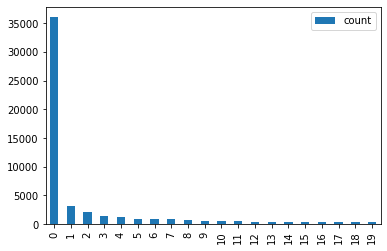

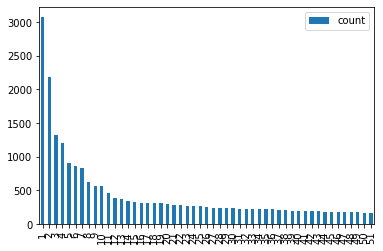

In [ ]:
total_counts = df["count"].sum()
print(f"total keywords: {len(df.index)}")
print(f"total counts  : {total_counts}")

display(df.head(20))
display(df[df["keyword"].str.match(r"(?i)(.*cov.*|.*cor.*|.*19.*)")].head(20))

df.head(20).plot.bar()
df.loc[1:51].plot.bar()

# df[df["keyword"].str.match(r"(?i)(.*cov.*|.*cor.*|.*19.*)")]
# df.where(df[df["keyword"].str.match(r"(?i)(.*cov.*|.*cor.*|.*19.*)")]["count"] > 1).dropna()

In [ ]:
top_keywords = [
    "COVID19",
    "covid19",
    "Covid19",
    "coronavirus",
    "COVID",
    "Coronavirus",
    "Covid_19",
    "Covid",
    "covid",
    "COVID_19",
]

date_since = "2019-12-31"

tweets = tweepy.Cursor(
    api.search,
    q=" OR ".join(top_keywords),
    lang="en",
    since=date_since
).items()

f = open(dataset_dir / "test.csv", "a")
count = 0

for tweet in tweets:
    print(tweet.coordinates)